# <b><u> Project Title : Predicting credit card defaults - Based on Taiwan data </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## **Objective:**


Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on defination of what actually meant by **Credit Card Default.**


> We are all aware what is **credit card**. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.




> **Credit card default** happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.


In [58]:
!git clone https://github.com/ply00/810.git
import pandas as pd
df = pd.read_csv("/content/810/default of credit card clients cleaned.csv")
df.head()

fatal: destination path '810' already exists and is not an empty directory.


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [59]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [61]:
path = '/content/810/default of credit card clients cleaned.csv'
df = pd.read_csv(path)

In [62]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

What we know about dataset :

We have records of 30000 customers. Below are the description of all features we have.

* ID: ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1 = male, 2 = female)

* EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

* AGE: Age in years

**Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_0: Repayment status in September, 2005 (scale same as above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.

So let's begin.

First we will check if we have any null values

In [64]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [65]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# **Exploratory Data Analysis**

## **Dependent Variable:**

In [66]:
#renaming for better convinience
df['IsDefaulter'] =df ['default.payment.next.month']
df.drop('default.payment.next.month',axis = 1, inplace=True)
# df.rename({'default.payment.next.month' : 'IsDefaulter'}, inplace=True)

<Axes: xlabel='IsDefaulter', ylabel='count'>

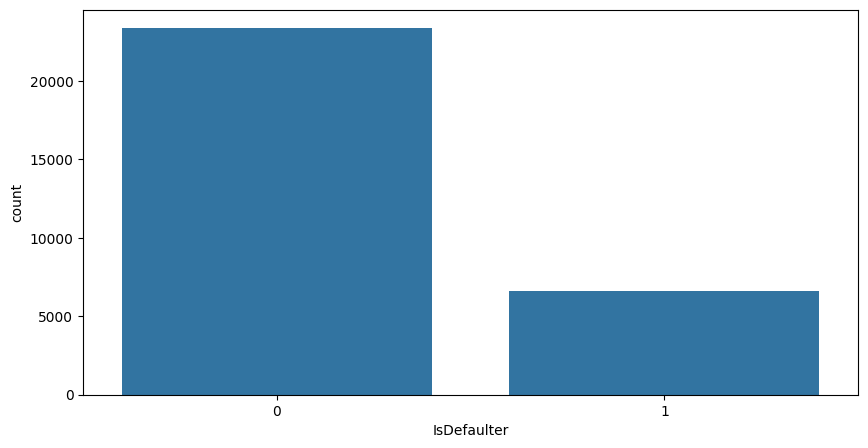

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)

In [68]:
df['IsDefaulter'].value_counts()

,count
IsDefaulter,
0,23364
1,6636


As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.




## **Independent Variable:**

### **Categorical  Features**

We have few categorical features in our dataset. Let'Check how they are related with out target class.

**SEX**



*   1 - Male
*   2 - Female


In [69]:
df['SEX'].value_counts()

,count
SEX,
2,18112
1,11888


**Education**



> 1 = graduate school; 2 = university; 3 = high school; 4 = others

In [70]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [71]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
4,468


**Marriage**


> 1 = married; 2 = single; 3 = others

In [72]:
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


We have few values for 0, which are not determined . So I am adding them in Others category.

In [73]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,377


**Plotting our categorical features**

In [74]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [75]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['IsDefaulter']

In [76]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 1000x500 with 0 Axes>

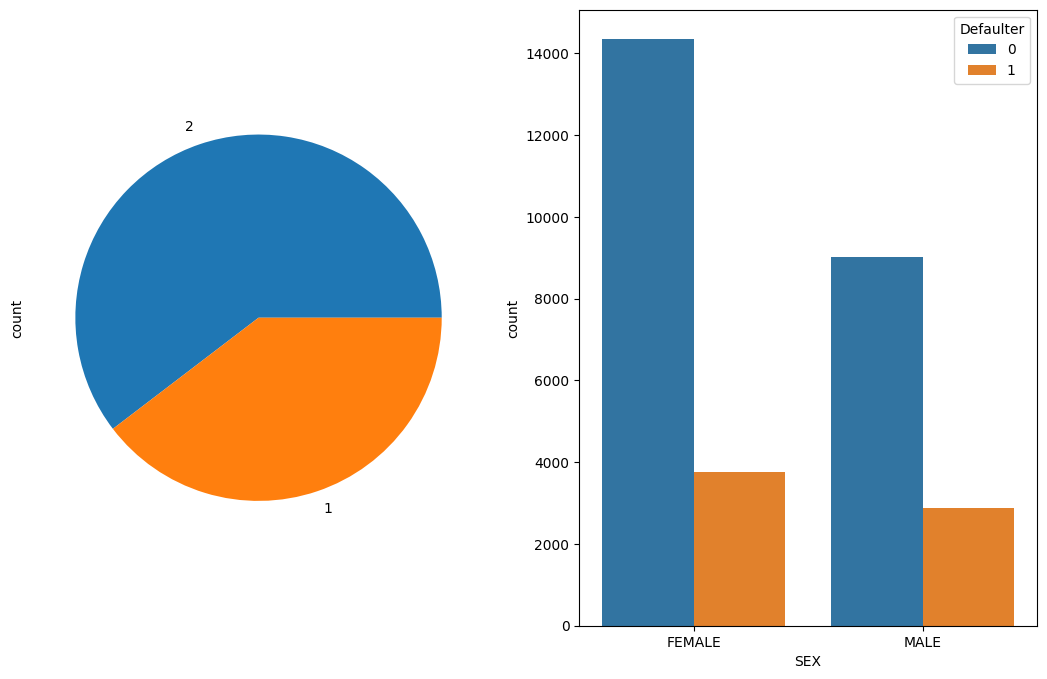

<Figure size 1000x500 with 0 Axes>

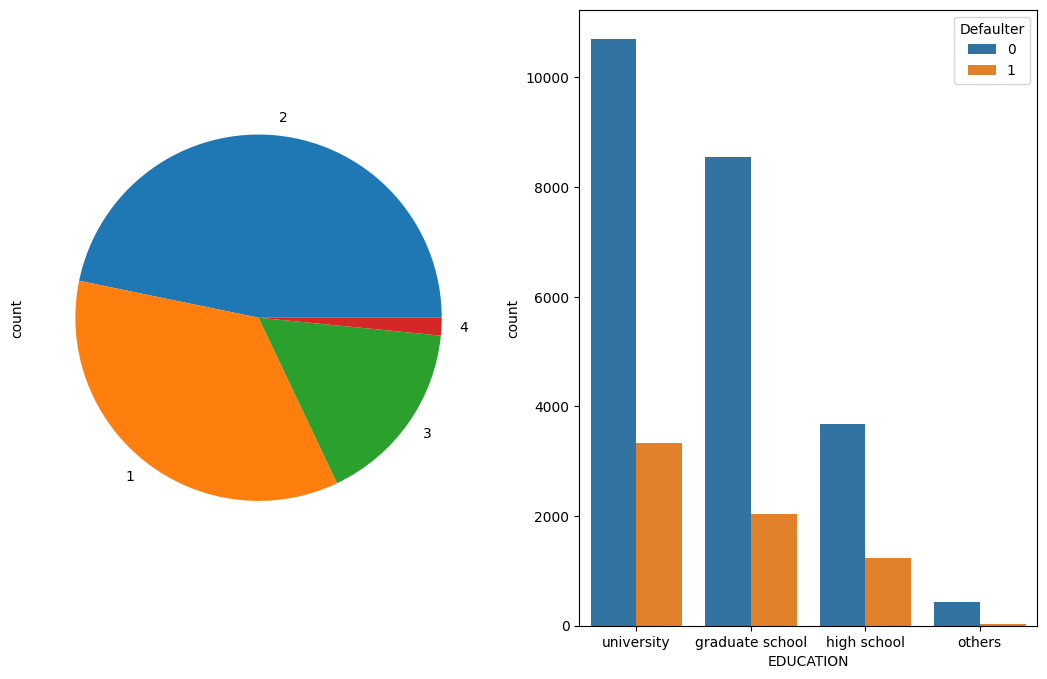

<Figure size 1000x500 with 0 Axes>

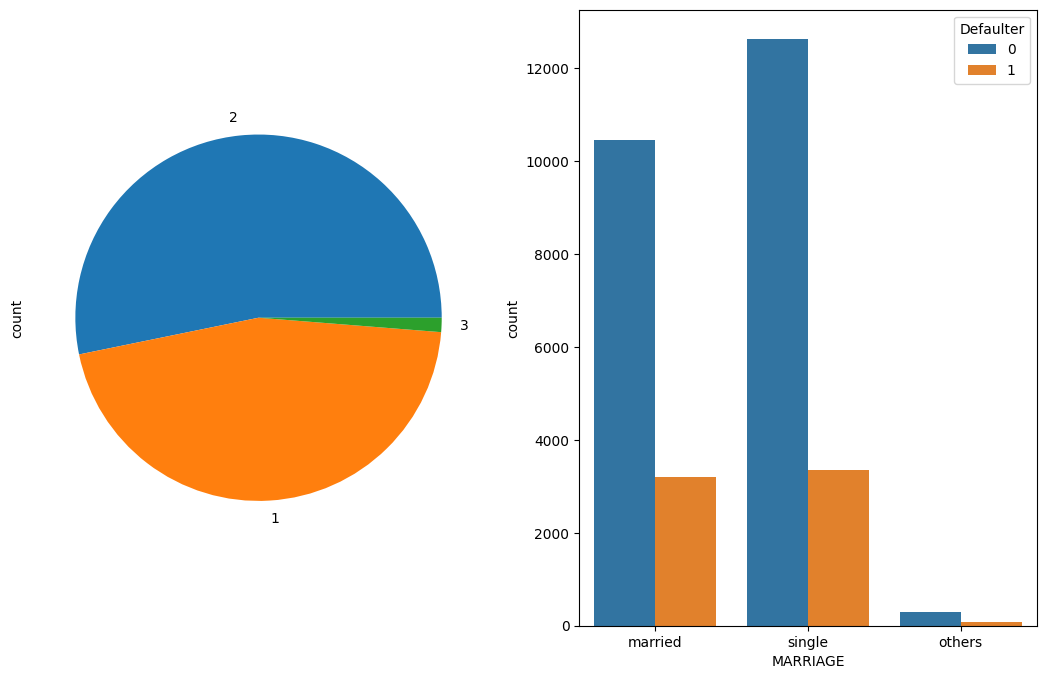

In [77]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

Below are few observations for categorical features:




*   There are more females credit card holder,so no. of defaulter have high proportion of females.
*   No. of defaulters have a higher proportion of educated people  (graduate school and university)
*  No. of defaulters have a higher proportion of Singles.






**Limit Balance**

In [78]:
df['LIMIT_BAL'].max()

1000000.0

In [79]:
df['LIMIT_BAL'].min()

10000.0

In [80]:
df['LIMIT_BAL'].describe()

,LIMIT_BAL
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

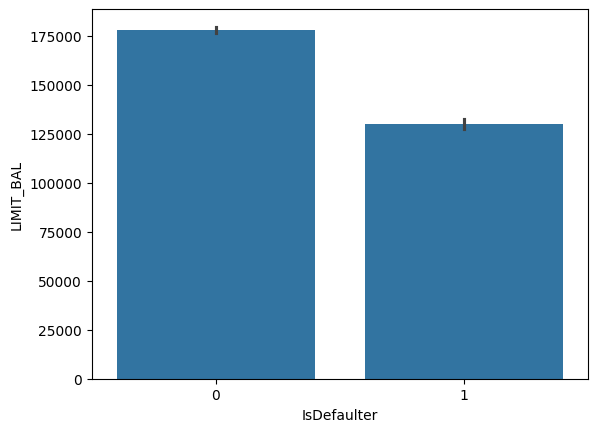

In [81]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

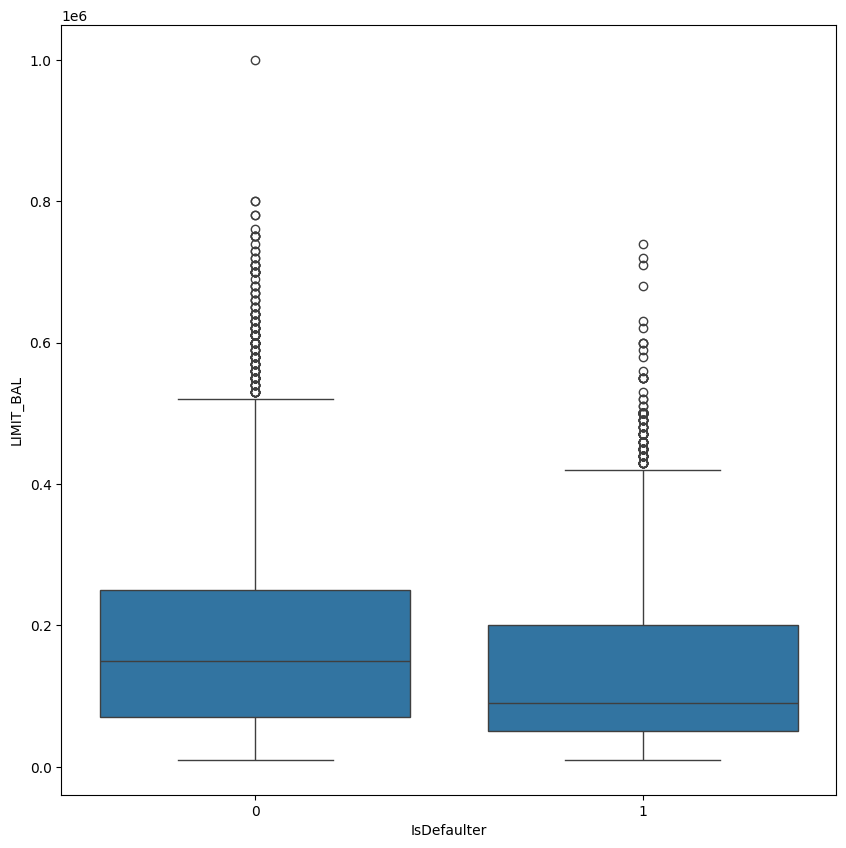

In [82]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

In [83]:
#renaming columns

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [84]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**AGE**

Plotting graph of number of ages of all people with credit card irrespective of gender.

In [85]:
df['AGE'].value_counts()

,count
AGE,
29,1605
27,1477
28,1409
30,1395
26,1256
31,1217
25,1186
34,1162
32,1158


In [86]:
df['AGE']=df['AGE'].astype('int')

<Axes: xlabel='AGE', ylabel='count'>

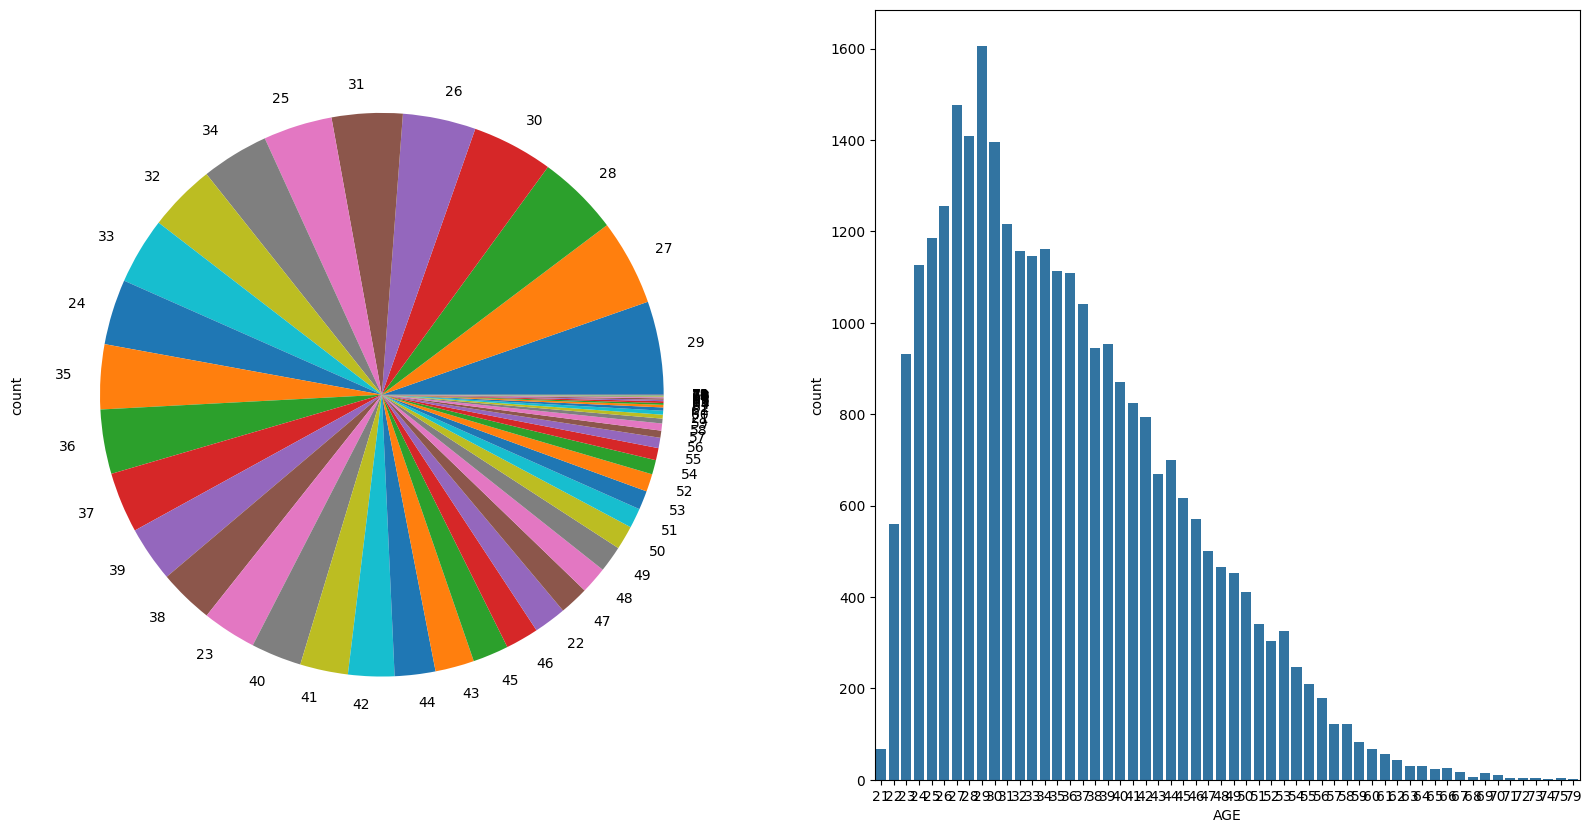

In [87]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
Day_df = df['AGE'].value_counts().reset_index()
Day_df.columns = ['AGE', 'count']
df['AGE'].value_counts().plot(kind="pie", ax=axes[0])
sns.barplot(x='AGE', y='count', data=Day_df, ax=axes[1])


In [88]:
df.groupby('IsDefaulter')['AGE'].mean()

,AGE
IsDefaulter,
0,35.417266
1,35.725738


In [89]:
df = df.astype('int')

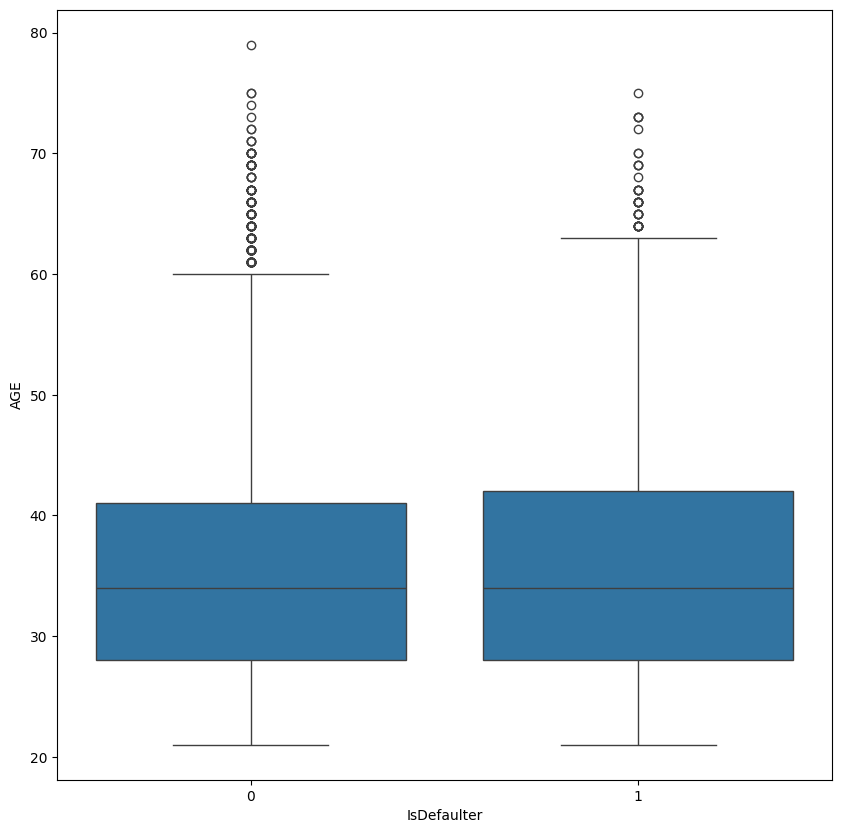

In [90]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

**Bill Amount**

In [91]:
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

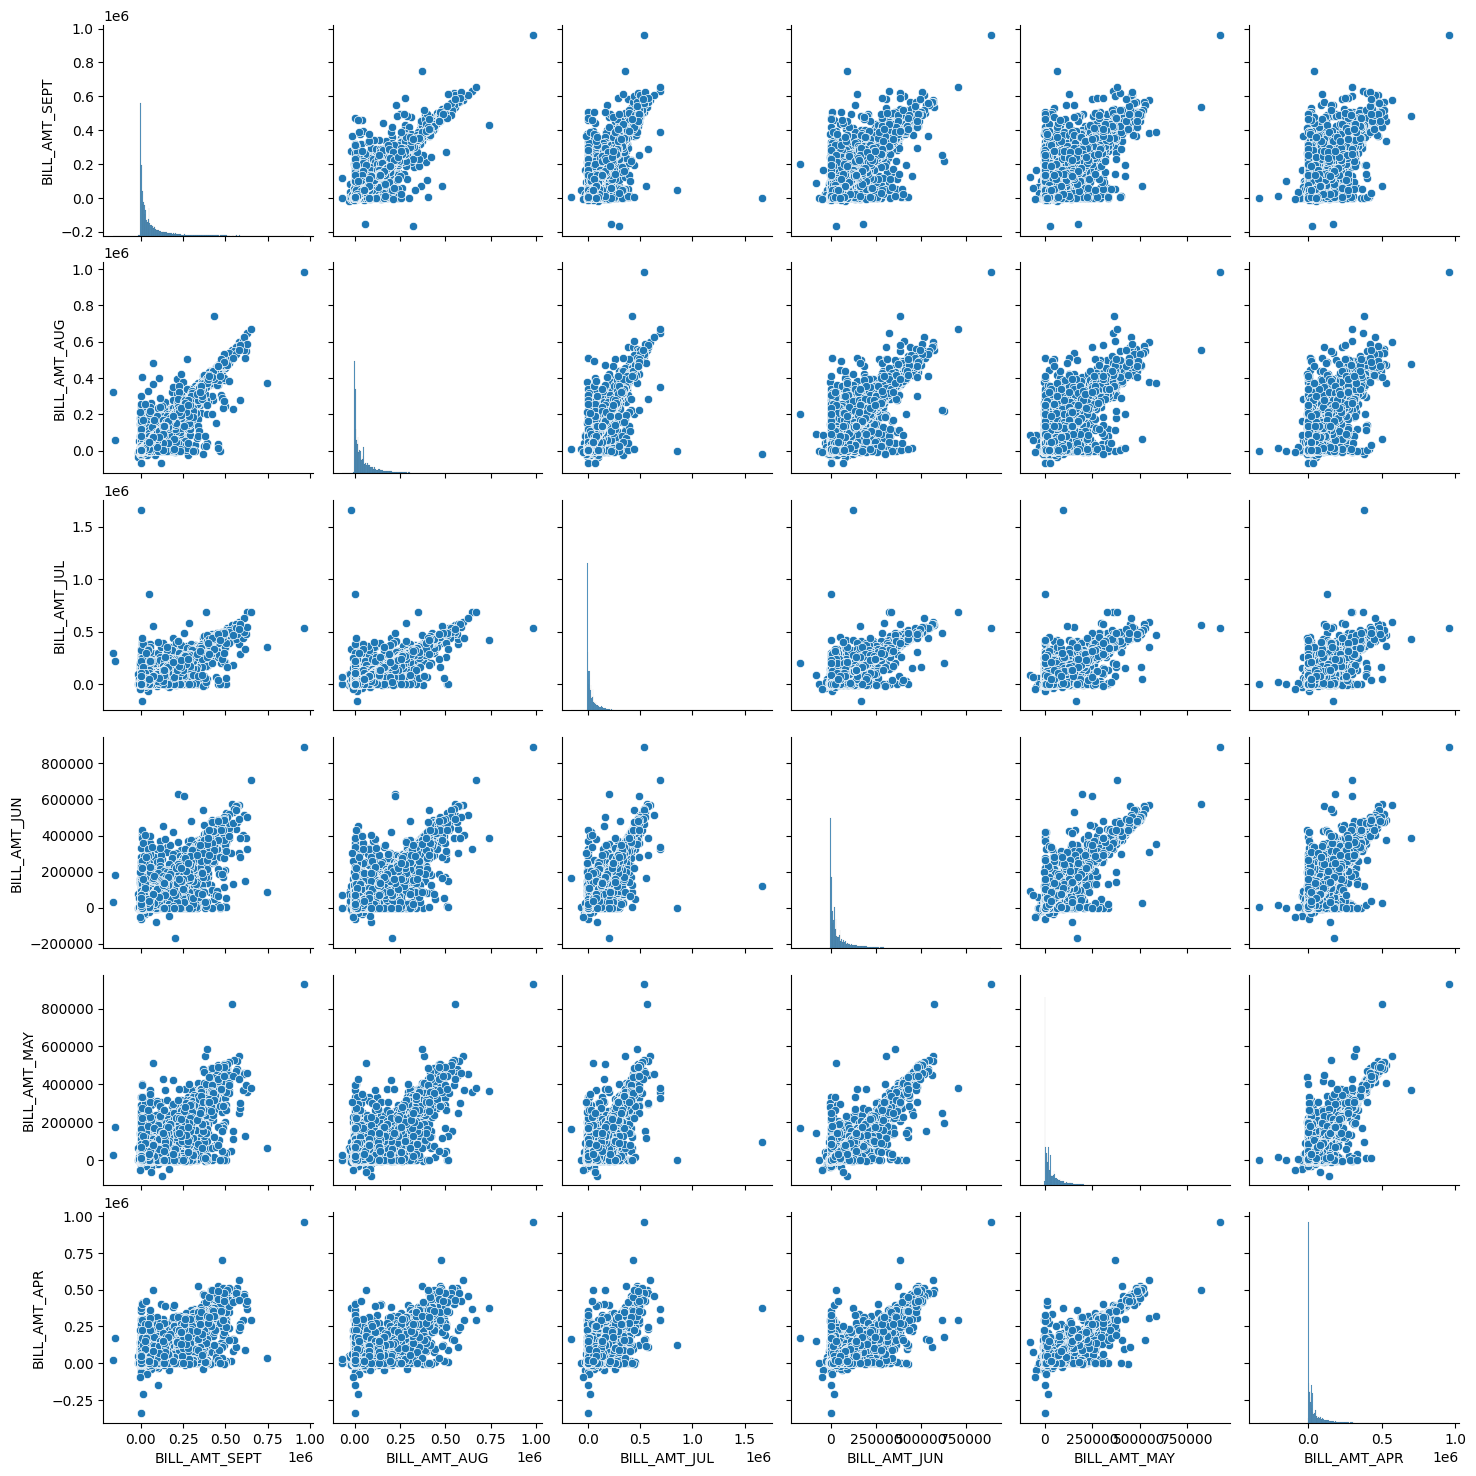

In [92]:
sns.pairplot(data = bill_amnt_df)

**History payment status**

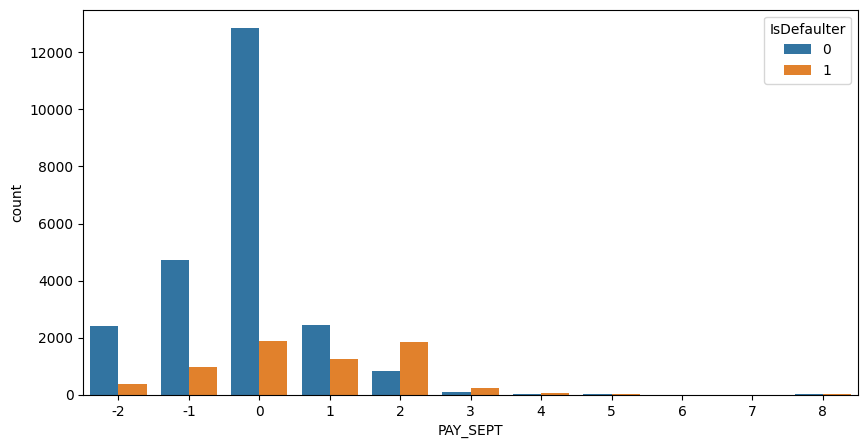

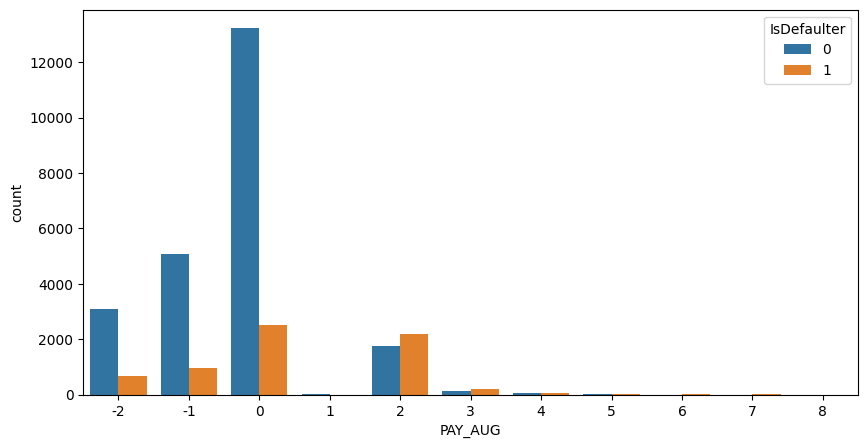

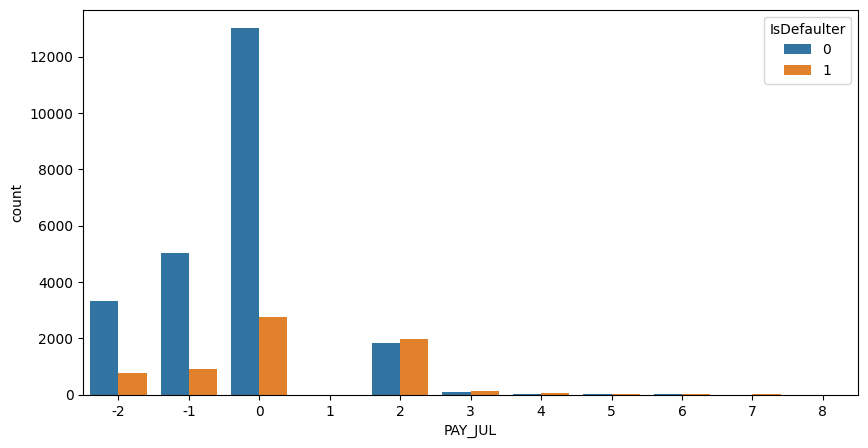

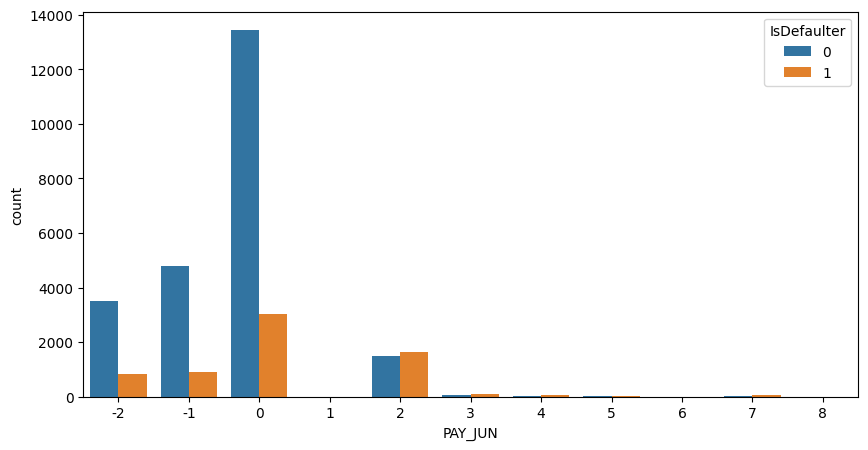

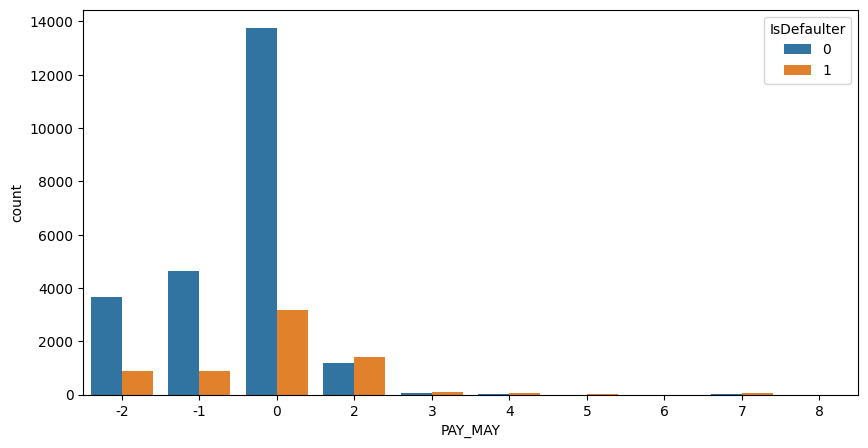

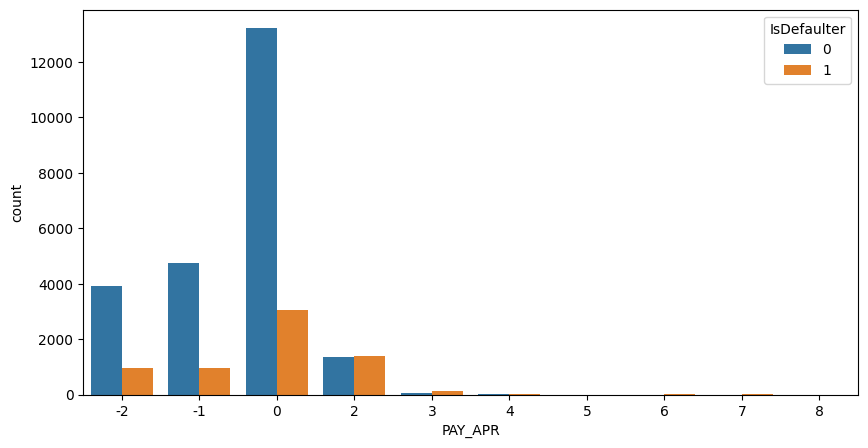

In [93]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

**Paid Amount**

In [94]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'IsDefaulter']]

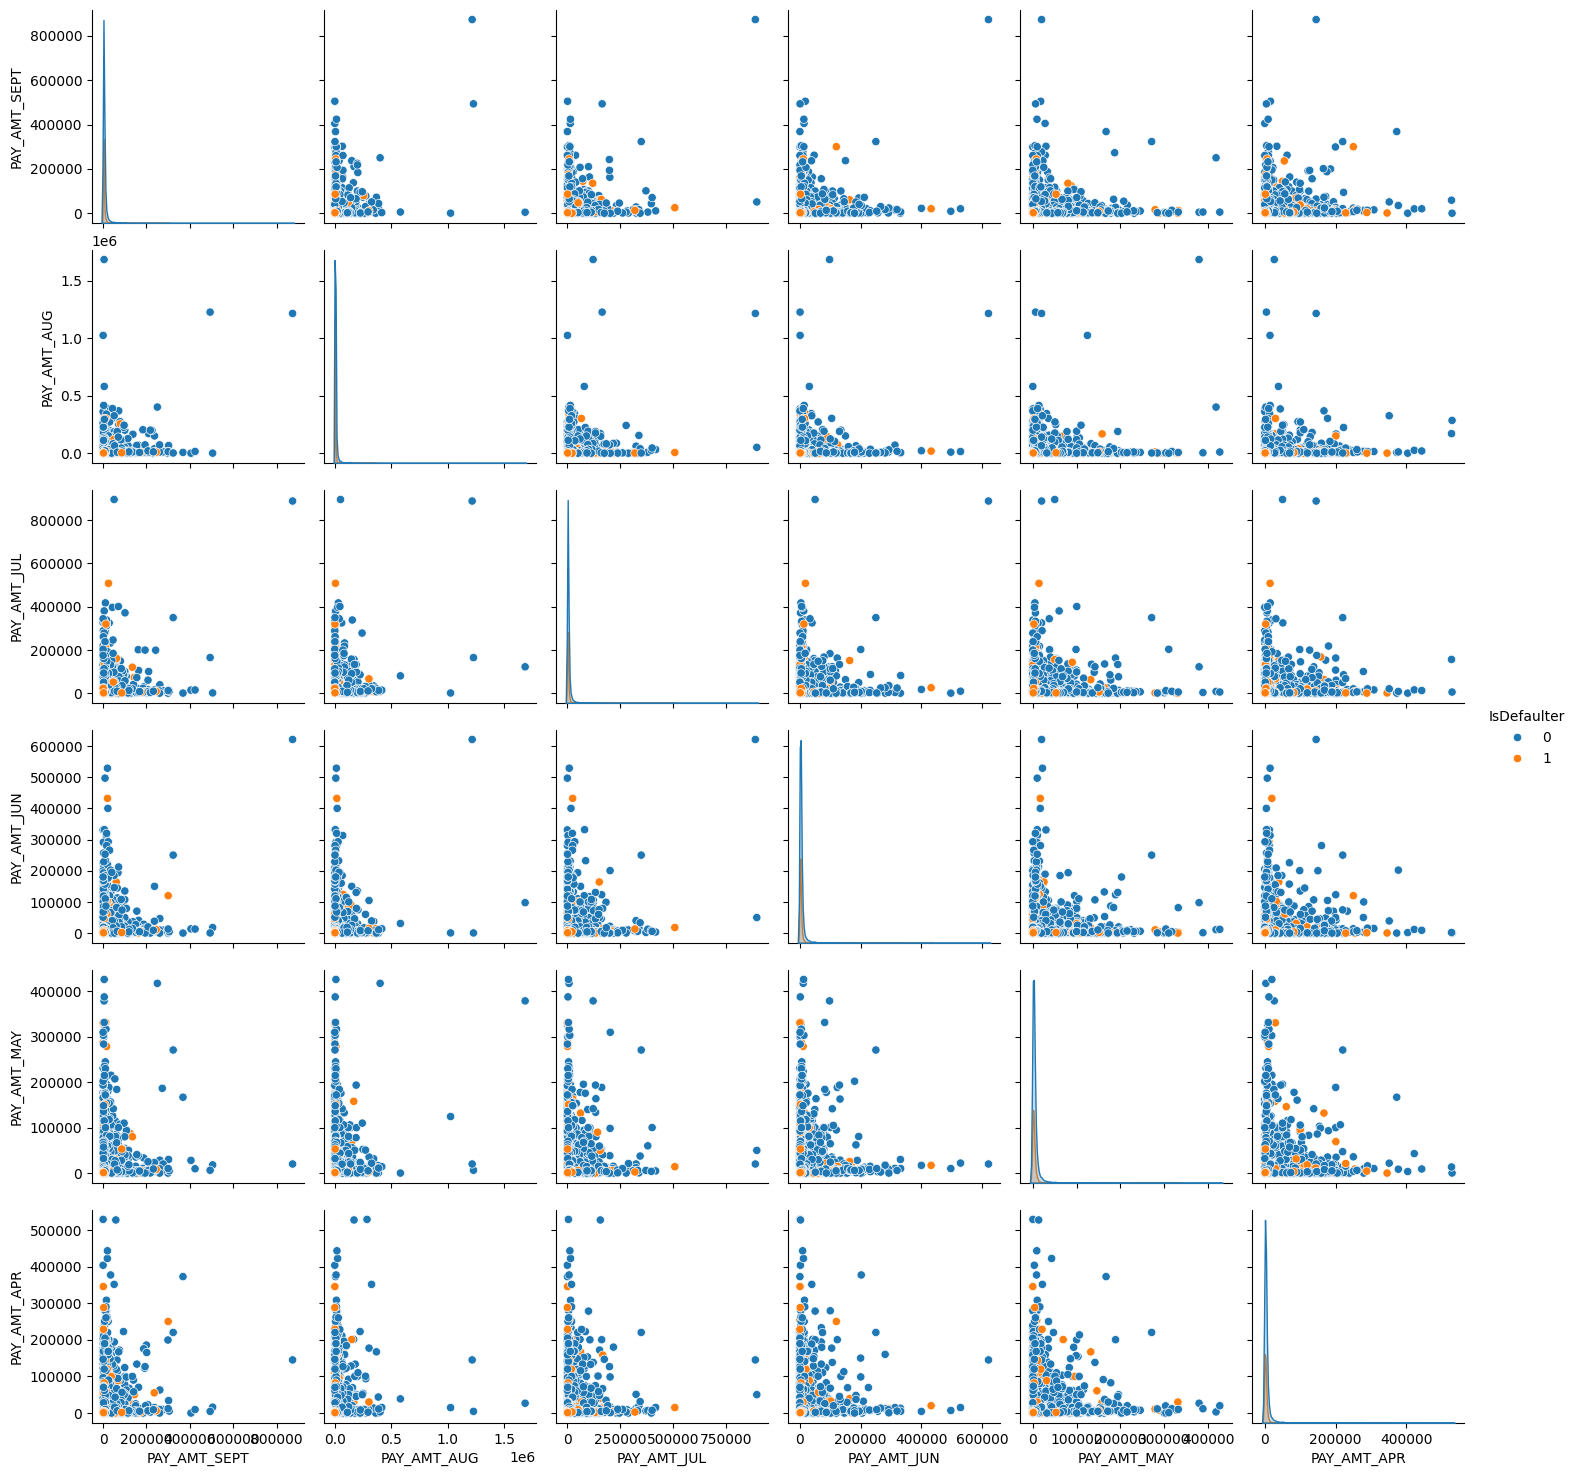

In [95]:
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

In [96]:
df.shape

(30000, 25)

### **As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)**

In [97]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Split first
X = df.drop('IsDefaulter', axis=1)
y = df['IsDefaulter']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# 2. Apply SMOTE only to training data
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print("Original train shape:", X_train.shape, y_train.shape)
print("After SMOTE:", x_smote.shape, y_smote.shape)


Original train shape: (20100, 24) (20100,)
After SMOTE: (31308, 24) (31308,)


In [98]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,2997,210000,2,2,1,27,2,2,0,0,...,161573,122362,116243,108414,16,6800,3800,5134,4000,4000
1,19276,210000,2,1,1,33,-2,-2,-2,-2,...,947,500,1283,500,6087,947,500,1283,500,500
2,4130,170000,2,1,1,52,-1,-1,2,-1,...,416,7509,6387,1516,3000,5,7509,6387,1666,3023
3,1424,200000,2,3,2,27,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
4,16347,70000,2,1,1,45,1,2,-1,2,...,3060,780,2079,0,0,3450,0,2079,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31303,19943,70000,1,1,1,48,0,1,0,0,...,37654,41812,44060,44908,159,1686,4799,3206,1749,1697
31304,19766,100000,1,2,2,25,0,1,0,0,...,10110,11452,12651,12793,986,1746,1746,1543,493,2506
31305,13774,20000,1,1,2,37,0,0,0,-1,...,0,1564,139,139,1356,0,1564,0,139,599
31306,6343,100000,1,2,1,32,2,2,2,2,...,31202,31428,31126,32924,1638,1180,969,249,2250,1319


In [99]:
columns = list(df.columns)

In [100]:
columns.pop()

'IsDefaulter'

In [101]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [102]:
balance_df['IsDefaulter'] = y_smote

<Axes: xlabel='IsDefaulter', ylabel='count'>

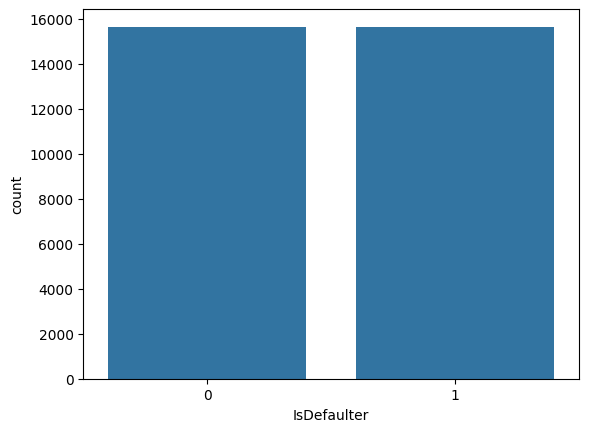

In [103]:
sns.countplot(x='IsDefaulter', data=balance_df)

In [104]:
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,2997,210000,2,2,1,27,2,2,0,0,...,122362,116243,108414,16,6800,3800,5134,4000,4000,1
4,16347,70000,2,1,1,45,1,2,-1,2,...,780,2079,0,0,3450,0,2079,0,0,1
9,11437,200000,2,2,1,43,2,2,2,2,...,150,2500,0,0,0,0,2500,0,0,1
11,29234,50000,1,2,2,23,0,0,0,0,...,18740,17861,17433,1497,1609,1279,1500,0,637,1
13,9829,100000,2,2,2,24,1,-1,-1,-2,...,0,0,150,670,0,0,0,150,477,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31303,19943,70000,1,1,1,48,0,1,0,0,...,41812,44060,44908,159,1686,4799,3206,1749,1697,1
31304,19766,100000,1,2,2,25,0,1,0,0,...,11452,12651,12793,986,1746,1746,1543,493,2506,1
31305,13774,20000,1,1,2,37,0,0,0,-1,...,1564,139,139,1356,0,1564,0,139,599,1
31306,6343,100000,1,2,1,32,2,2,2,2,...,31428,31126,32924,1638,1180,969,249,2250,1319,1


# Feature Engineering

In [105]:
df_fr = balance_df.copy()

In [106]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']

In [107]:
df_fr.groupby('IsDefaulter')['Payement_Value'].mean()

,Payement_Value
IsDefaulter,
0,-2.003769
1,1.743133


<Axes: xlabel='IsDefaulter', ylabel='Payement_Value'>

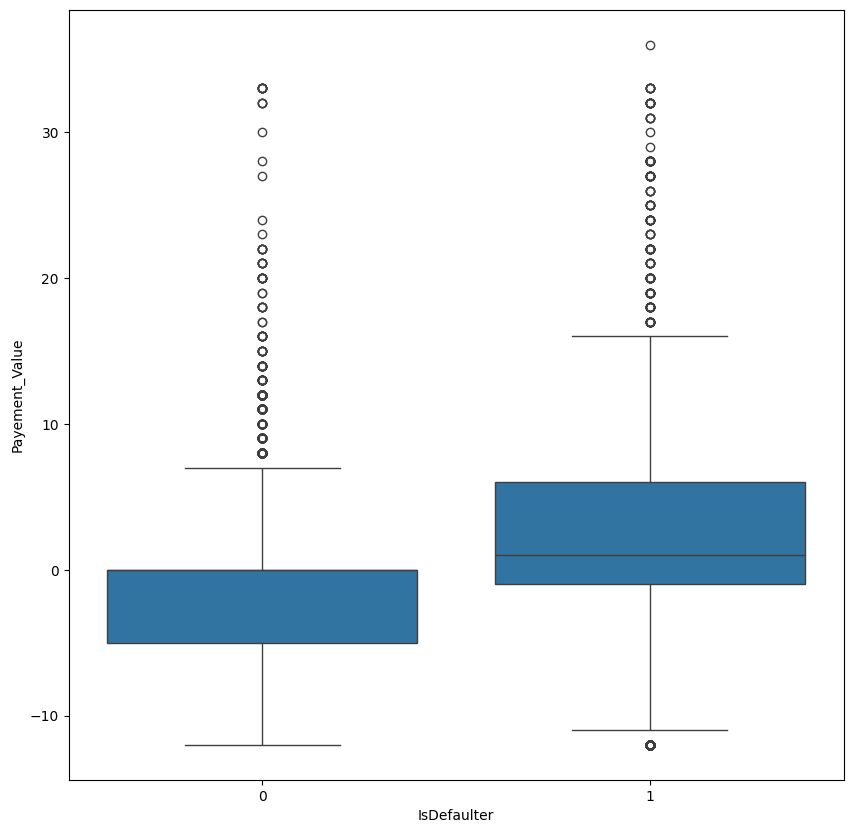

In [108]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payement_Value' )

In [109]:
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [110]:
df_fr.groupby('IsDefaulter')['Dues'].mean()

,Dues
IsDefaulter,
0,189021.727929
1,194329.632810


In [111]:
df_fr['EDUCATION'].unique()

array([2, 1, 3, 4])

In [112]:

df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

In [113]:

df_fr['MARRIAGE'].unique()

array([1, 2, 3])

In [114]:
df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [115]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [116]:
df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,2997,210000,FEMALE,university,married,27,2,2,0,0,...,108414,16,6800,3800,5134,4000,4000,1,4,658976
1,19276,210000,FEMALE,graduate school,married,33,-2,-2,-2,-2,...,500,6087,947,500,1283,500,500,0,-12,-5242
2,4130,170000,FEMALE,graduate school,married,52,-1,-1,2,-1,...,1516,3000,5,7509,6387,1666,3023,0,-3,-2823
3,1424,200000,FEMALE,high school,single,27,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,-9,0
4,16347,70000,FEMALE,graduate school,married,45,1,2,-1,2,...,0,0,3450,0,2079,0,0,1,2,6759


# One Hot Encoding

In [117]:
df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])

In [118]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,IsDefaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,2997,210000,FEMALE,27,2,2,0,0,0,0,...,1,4,658976,False,False,False,True,True,False,False
1,19276,210000,FEMALE,33,-2,-2,-2,-2,-2,-2,...,0,-12,-5242,True,False,False,False,True,False,False
2,4130,170000,FEMALE,52,-1,-1,2,-1,-1,-1,...,0,-3,-2823,True,False,False,False,True,False,False
3,1424,200000,FEMALE,27,1,-2,-2,-2,-2,-2,...,0,-9,0,False,True,False,False,False,False,True
4,16347,70000,FEMALE,45,1,2,-1,2,-1,-1,...,1,2,6759,True,False,False,False,True,False,False


In [119]:
df_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [120]:
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [121]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,2997,210000,FEMALE,27,174134,167095,161573,122362,116243,108414,...,False,True,False,False,False,False,False,False,False,False
1,19276,210000,FEMALE,33,1345,6087,947,500,1283,500,...,False,False,False,False,False,False,False,False,False,False
2,4130,170000,FEMALE,52,2939,5447,416,7509,6387,1516,...,True,False,False,False,False,False,False,False,False,False
3,1424,200000,FEMALE,27,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,16347,70000,FEMALE,45,6369,390,3060,780,2079,0,...,True,False,False,False,False,False,False,False,False,False


In [122]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [123]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,2997,210000,0,27,174134,167095,161573,122362,116243,108414,...,False,True,False,False,False,False,False,False,False,False
1,19276,210000,0,33,1345,6087,947,500,1283,500,...,False,False,False,False,False,False,False,False,False,False
2,4130,170000,0,52,2939,5447,416,7509,6387,1516,...,True,False,False,False,False,False,False,False,False,False
3,1424,200000,0,27,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,16347,70000,0,45,6369,390,3060,780,2079,0,...,True,False,False,False,False,False,False,False,False,False


In [124]:
df_fr.drop('ID',axis = 1, inplace = True)

In [125]:
df_fr.to_csv('Final_df.csv')

In [126]:
df_fr = pd.read_csv('./Final_df.csv')


In [127]:
df_fr.head()

,Unnamed: 0,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,0,210000,0,27,174134,167095,161573,122362,116243,108414,...,False,True,False,False,False,False,False,False,False,False
1,1,210000,0,33,1345,6087,947,500,1283,500,...,False,False,False,False,False,False,False,False,False,False
2,2,170000,0,52,2939,5447,416,7509,6387,1516,...,True,False,False,False,False,False,False,False,False,False
3,3,200000,0,27,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,4,70000,0,45,6369,390,3060,780,2079,0,...,True,False,False,False,False,False,False,False,False,False


In [128]:
df_fr.drop(['Unnamed: 0'],axis = 1, inplace = True)

# Implementing Logistic Regression

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

In [129]:
df_log_reg = df_fr.copy()

In [130]:
df_log_reg.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,210000,0,27,174134,167095,161573,122362,116243,108414,16,...,False,True,False,False,False,False,False,False,False,False
1,210000,0,33,1345,6087,947,500,1283,500,6087,...,False,False,False,False,False,False,False,False,False,False
2,170000,0,52,2939,5447,416,7509,6387,1516,3000,...,True,False,False,False,False,False,False,False,False,False
3,200000,0,27,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,70000,0,45,6369,390,3060,780,2079,0,0,...,True,False,False,False,False,False,False,False,False,False


In [131]:
X = df_log_reg.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_log_reg['IsDefaulter']

In [132]:
columns = X.columns

In [133]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [135]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [136]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [137]:
optimized_clf = grid_lr_clf.best_estimator_

In [138]:
grid_lr_clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [139]:
grid_lr_clf.best_score_

np.float64(0.752526697177727)

In [140]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [141]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [142]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7549580472921434
The accuracy on test data is  0.7499032133178475


In [143]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7499032133178475
The precision on test data is  0.6815718157181572
The recall on test data is  0.7894618834080718
The f1 on test data is  0.7315603573654685
The roc_score on test data is  0.7546594158184773


[[8602 1886]
 [3254 7234]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

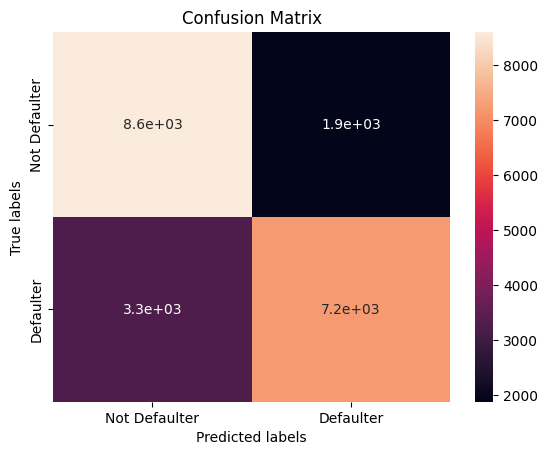

In [144]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [145]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [146]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

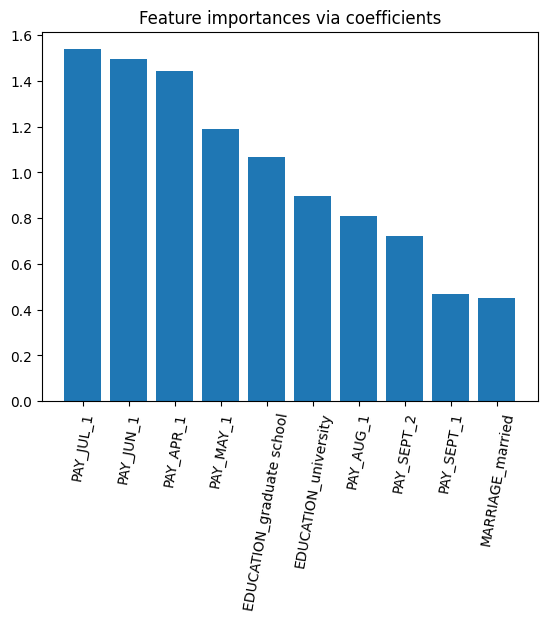

In [147]:

plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [148]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

In [149]:
'''
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()'''

'\ny_pred_proba = y_preds_proba_lr\nfpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)\nauc = metrics.roc_auc_score(y_test, y_pred_proba)\nplt.plot(fpr,tpr,label="data 1, auc="+str(auc))\nplt.legend(loc=4)\nplt.show()'

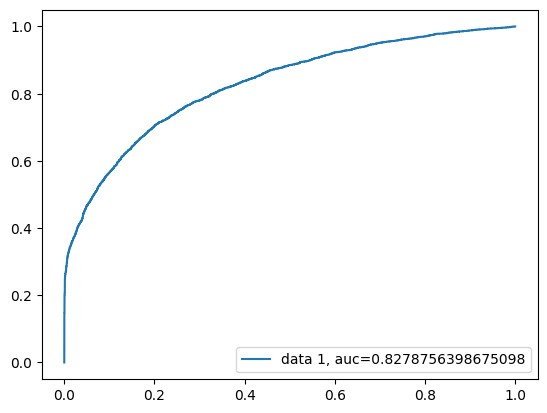

In [150]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter.

# Implementing SVC

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf']}

In [153]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [154]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [156]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [157]:
optimal_SVC_clf = grid_clf.best_estimator_

In [158]:
grid_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [159]:
grid_clf.best_score_

np.float64(0.7754099923722348)

In [160]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [161]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7549580472921434
The accuracy on test data is  0.7499032133178475


In [162]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.7798102981029811
The precision on test data is  0.7096399535423926
The recall on test data is  0.8254897545597838
The f1 on test data is  0.7631935047361299
The roc_score on test data is  0.7854320271695541


We can see from above results that we are getting  around 80% train accuracy and 78% for test accuracy. But f1- score is 76% approx, so there might be more ground for improvement.

[[9327 1161]
 [2751 7737]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

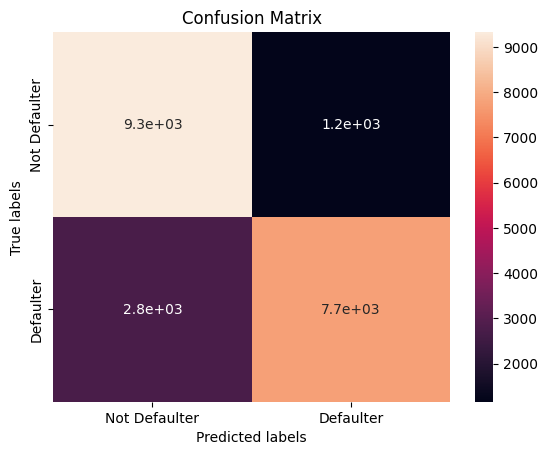

In [163]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [164]:
import torch

In [165]:
model_save_name = 'SVC_optimized_classifier.pt'
path = F"./{model_save_name}"
torch.save(optimal_SVC_clf, path)

In [166]:
model_save_name = "SVC_optimized_classifier.pt"
path = f"./{model_save_name}"
optimal_SVC_clf = torch.load(path, weights_only=False)

In [167]:
optimal_SVC_clf

SVC(C=10, probability=True)

In [168]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [169]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

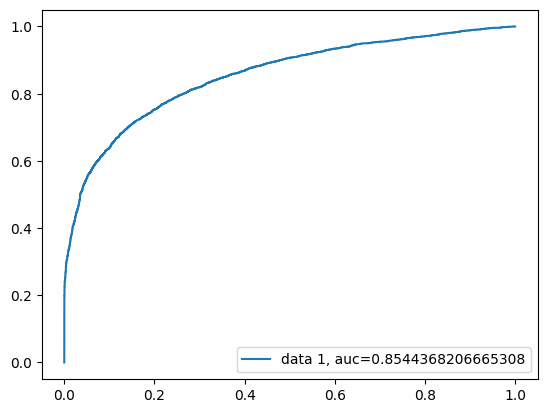

In [170]:
# SVC ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing Decision Tree

Decision Trees are widely used for classification because they are intuitive and easy to interpret. Each internal node represents a feature-based split, and each leaf corresponds to a prediction. They require minimal preprocessing and no feature scaling. However, they tend to overfit, especially in noisy or imbalanced datasets.

In [171]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [175]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [176]:
grid_DTC_clf.best_score_

np.float64(0.7152936689549961)

In [177]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [178]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [179]:
grid_DTC_clf.best_params_

{'max_depth': 30, 'min_samples_split': 0.1}

In [180]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7197749809305873
The accuracy on test data is  0.705381339527681


# Implementing RandomForest

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [183]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [184]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [185]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9997139588100686
The accuracy on test data is  0.8347851335656213


In [186]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8347851335656213
The precision on test data is  0.8041037553232675
The recall on test data is  0.8566714786553928
The f1 on test data is  0.8295556665002496
The roc_score on test data is  0.8360504940240305


We can see from above results that we are getting  around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%.

In [187]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [188]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [189]:
grid_rf_clf.best_score_

np.float64(0.8244660564454614)

In [190]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 150}

In [191]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [192]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [193]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9994279176201373
The accuracy on test data is  0.832171893147503


In [194]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.832171893147503
The precision on test data is  0.8017808749516067
The recall on test data is  0.8536685902720528
The f1 on test data is  0.8269115591934518
The roc_score on test data is  0.8334036382017198


In [195]:
len(optimal_rf_clf.feature_importances_)

79

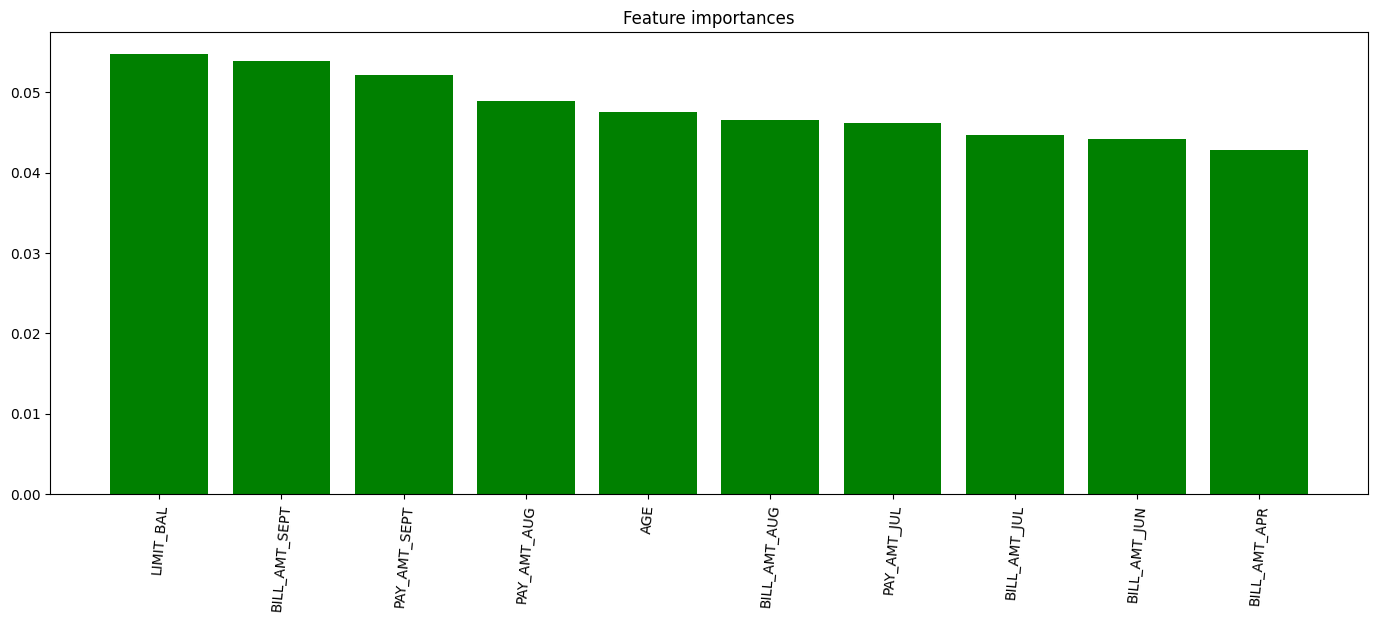

In [196]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]

plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [197]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"./{model_save_name}"
torch.save(optimal_rf_clf, path)

In [198]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"./{model_save_name}"
optimal_rf_clf = torch.load(path, weights_only=False)

In [199]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [200]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

In [201]:
import sklearn.metrics as metrics

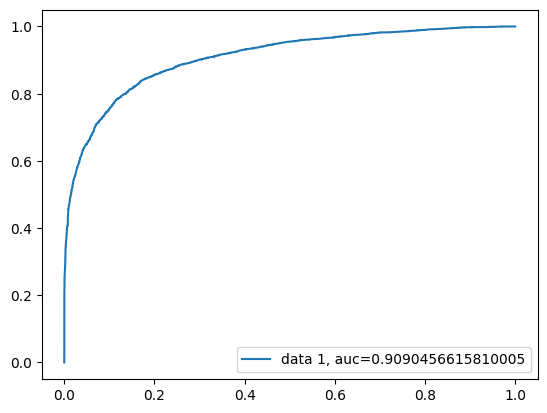

In [202]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing XGBoost

In [203]:
#import lightgbm and xgboost
import lightgbm as lgb
import xgboost as xgb

# Applying XGBoost

In [204]:
#The data is stored in a DMatrix object
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [205]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [206]:
#training our model
num_round=50
from datetime import datetime
start = datetime.now()
xg=xgb.train(parameters,dtrain,num_round)
stop = datetime.now()

In [207]:
#Execution time of the model
execution_time_xgb = stop-start
execution_time_xgb

datetime.timedelta(microseconds=535421)

In [208]:
#now predicting our model on train set
train_class_preds_probs=xg.predict(dtrain)
#now predicting our model on test set
test_class_preds_probs =xg.predict(dtest)

In [209]:
len(train_class_preds_probs)

20976

In [210]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [211]:
test_class_preds_probs[:20]

array([0.44808048, 0.96346927, 0.16489512, 0.68760544, 0.52760464,
       0.906924  , 0.3628544 , 0.85496056, 0.2735868 , 0.7737638 ,
       0.15958004, 0.86957794, 0.38656345, 0.45281863, 0.8347663 ,
       0.23945777, 0.4021697 , 0.47358707, 0.40386927, 0.31801003],
      dtype=float32)

In [212]:
test_class_preds[:20]

[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

In [213]:
len(y_train)

20976

In [214]:
len(train_class_preds)

20976

In [215]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.7921910755148741
The accuracy on test data is  0.7731320170344561


In [216]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.7731320170344561
The precision on test data is  0.6968641114982579
The recall on test data is  0.8222932846048424
The f1 on test data is  0.7544006705783739
The roc_score on train data is  0.7796384125409163


# Hyperparameter Tuning

In [217]:
from xgboost import  XGBClassifier

In [218]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [220]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     le...ng_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [221]:
gsearch1.best_score_

np.float64(0.8239416475972541)

In [222]:
optimal_xgb = gsearch1.best_estimator_

In [223]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [224]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9445080091533181
The accuracy on test data is  0.8364305071622145


In [225]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8364305071622145
The precision on test data is  0.8008130081300813
The recall on test data is  0.862234264276782
The f1 on test data is  0.8303894018466479
The roc_score on train data is  0.8381464057198872


In [226]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
PAY_AUG_1,0.150584
PAY_JUL_1,0.124082
PAY_AUG_2,0.085010
PAY_JUN_1,0.056980
PAY_APR_1,0.056615
PAY_SEPT_2,0.052942
PAY_MAY_1,0.044465
SEX,0.028251
MARRIAGE_married,0.026840
PAY_SEPT_1,0.025406


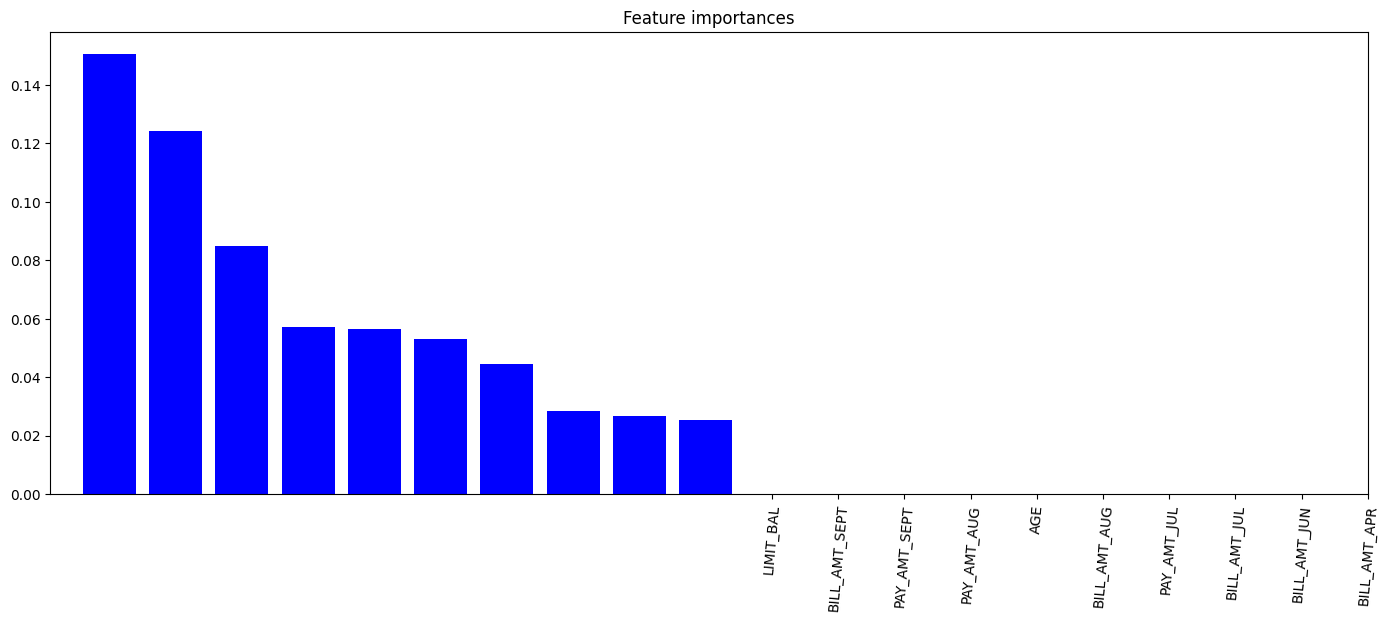

In [227]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [228]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

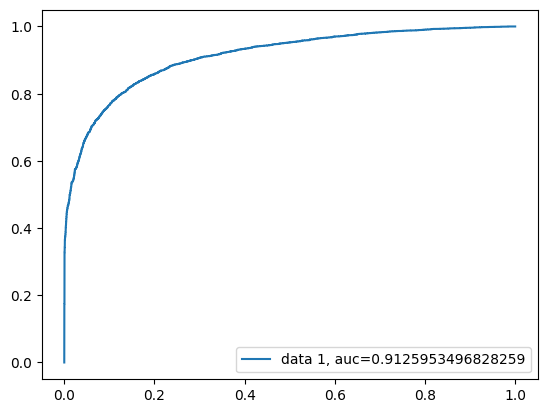

In [229]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [230]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"./{model_save_name}"
torch.save(optimal_xgb, path)

In [231]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"./{model_save_name}"
optimal_xgb = torch.load(path,weights_only=False)

# Evaluating the models

In [232]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [233]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [234]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.754958,0.749903,0.681572,0.789462,0.731560
1,SVC,0.813501,0.779810,0.709640,0.825490,0.763194
2,Random Forest CLf,0.999428,0.832172,0.801781,0.853669,0.826912
3,Xgboost Clf,0.944508,0.836431,0.800813,0.862234,0.830389


# Plotting ROC AUC for all the models

In [249]:
scaler = StandardScaler()
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)

# Collect paramater data
y_preds_proba_lr  = optimized_clf.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_SVC  = optimal_SVC_clf.predict_proba(X_test_scaled)[:, 1]

y_preds_proba_rf  = optimal_rf_clf.predict_proba(X_test)[:, 1]
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[:, 1]

classifiers_proba = [
    (optimized_clf,   y_preds_proba_lr),
    (optimal_rf_clf,  y_preds_proba_rf),
    (optimal_xgb,     y_preds_proba_xgb),
    (optimal_SVC_clf, y_pred_proba_SVC)
]


In [250]:
rows = []

for clf, proba in classifiers_proba:
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)

    rows.append({
        "classifiers": clf.__class__.__name__,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc
    })

result_table = pd.DataFrame(rows).set_index("classifiers")
result_table


,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00019357336430507162, 0.00271002710027...",0.827849
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.037359659310878826, 0.0377468060394889...",0.909046
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00019357336430507162, 0.00116144018583...",0.912595
SVC,"[0.0, 0.0, 0.0, 0.00019357336430507162, 0.0001...","[0.0, 0.00019357336430507162, 0.13375919473480...",0.854572


In [251]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr),
                     (optimal_rf_clf, y_preds_proba_rf),
                     (optimal_xgb, y_preds_proba_xgb),
                     (optimal_SVC_clf, y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test, pair[1])
    auc = roc_auc_score(y_test, pair[1])
    new_row = pd.DataFrame([{
        'classifiers': pair[0].__class__.__name__,
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc
    }])

    result_table = pd.concat([result_table, new_row], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


In [252]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00019357336430507162, 0.00271002710027...",0.827849
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.037359659310878826, 0.0377468060394889...",0.909046
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00019357336430507162, 0.00116144018583...",0.912595
SVC,"[0.0, 0.0, 0.0, 0.00019357336430507162, 0.0001...","[0.0, 0.00019357336430507162, 0.13375919473480...",0.854572


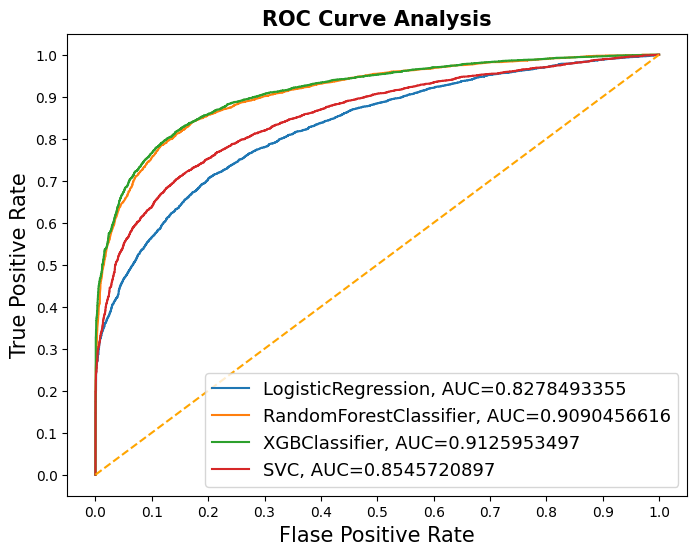

In [253]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.10f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()